In [78]:


!pip install -q gradio


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import gradio as gr
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from gradio import   Interface

In [84]:
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_URL = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
IMAGE_SHAPE = (321, 321)


In [85]:
classifier = tf.keras.Sequential([hub.KerasLayer(TF_MODEL_URL,
                                                 input_shape=IMAGE_SHAPE+(3,),
                                                 output_key="predictions:logits")])

In [87]:
df = pd.read_csv(LABEL_MAP_URL)

In [88]:
label_map = dict(zip(df.id, df.name))

In [89]:
df.head(3)


,id,name
0,0,Bagha Shahi Mosque
1,1,City Palace
2,2,The Immaculate Conception Cathedral of Cubao


In [90]:
img_loc = "/harmindersahib.jpg"


In [91]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

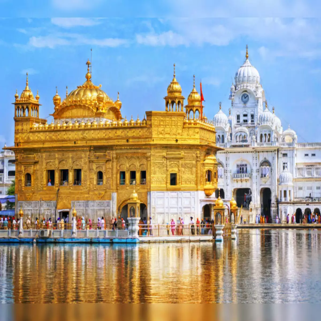

In [92]:

img


In [93]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [94]:
img = img[np.newaxis, ...]

In [95]:
img.shape


(1, 321, 321, 3)

In [96]:
result = classifier.predict(img)

1/1 [==============================] - 2s 2s/step


In [97]:
result


array([[ 0.22706757,  0.5080472 , -0.00650557, ..., -0.04426345,
        -0.08173208,  0.17973563]], dtype=float32)

In [98]:
label_map[np.argmax(result)]

'Akal Takht'

In [100]:
class_names=list(label_map.values())

In [101]:
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

In [ ]:


# Assuming target_shape is (321, 321)
target_shape = (321, 321)

def resize_or_crop_function(input_image, target_shape):
    pil_image = Image.fromarray((input_image * 255).astype(np.uint8))
    resized_image = pil_image.resize(target_shape, Image.ANTIALIAS)
    resized_image_np = np.array(resized_image) / 255.0
    return resized_image_np

def classify_image(image):
    resized_image = resize_or_crop_function(image, target_shape)
    img = resized_image[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

# Create the Gradio interface using gr.TrainedModel
model_interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs=gr.Label(num_top_classes=1),

)

# Launch the interface
model_interface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9d1ecf2d23c62e9fe1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


<ipython-input-118-668c3d7eff57>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = pil_image.resize(target_shape, Image.ANTIALIAS)


1/1 [==============================] - 0s 89ms/step
